Você foi contratado como analista de dados para uma loja on-line que deseja entender melhor os padrões de compra de seus clientes.

A empresa possui dados sobre várias características dos clientes, como o valor médio gasto, a frequência de compras e o número de categorias de produtos comprados. No entanto, esses dados não possuem rótulos que definem quais grupos de clientes existem.

Seu objetivo é segmentar os clientes em grupos semelhantes, usando um algoritmo de clustering.  Vamos lá?!

Instruções

Primeiro, gere o Dataset:

Utilize o Python para criar um dataset sintético com pelo menos 300 registros de clientes;

O dataset deve conter pelo menos 3 features que representam diferentes aspectos do comportamento do cliente, como:

`valor_medio_gasto`: representa o valor médio gasto por compra.

 `frequencia_compras`: representa o número de compras feitas em um mês.

`categorias_produtos`: representa o número de categorias de produtos comprados.



Dica: Você pode utilizar a função `numpy.random.randn` para gerar dados com uma distribuição normal para essas features, garantindo que os valores tenham alguma variabilidade.

Segue o exemplo de código que você pode implementar:

```

# Importando as ferramentas necessárias



python

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans



# Gerando o dataset sintético



np.random.seed(0)

n_samples = 300



data = {

    'valor_medio_gasto': np.random.randn(n_samples) * 20 + 200,

    'frequencia_compras': np.random.randn(n_samples) * 5 + 15,

    'categorias_produtos': np.random.randn(n_samples) * 2 + 8

}



df = pd.DataFrame(data)

```



Em seguida, escolha e implemente um algoritmo de clustering para aplicar aos dados.

Você pode optar por K-means ou DBSCAN, dependendo do que considerar mais adequado para o problema.

Implemente o algoritmo escolhido usando a biblioteca **Scikit-learn**.

Agrupe os dados com base nas features que você criou.



Na sequência, justifique sua implementação:

Escreva um pequeno texto justificando a escolha do algoritmo que você utilizou. Considere os seguintes pontos:

Por que esse algoritmo é adequado para o problema apresentado?

Quais são as vantagens e possíveis limitações do algoritmo escolhido no contexto deste problema?

Como os clusters formados podem ser interpretados para gerar insights para a loja on-line?

Ao finalizar, envie o código Python implementado e a visualização dos clusters gerados juntamente ao texto que você elaborou.

Bons estudos!

In [1]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
#Criando dataset
np.random.seed(0)
n_samples = 300

data = {
    'valor_medio_gasto': np.random.randn(n_samples) * 20 + 200,
    'frequencia_compras': np.random.randn(n_samples) * 5 + 15,
    'categorias_produtos': np.random.randn(n_samples) * 2 + 8
}

df = pd.DataFrame(data)
df


,valor_medio_gasto,frequencia_compras,categorias_produtos
0,235.281047,8.467366,4.899141
1,208.003144,23.290653,8.834638
2,219.574760,14.409180,6.111263
3,244.817864,11.599109,8.476206
4,237.351160,18.331915,5.188074
...,...,...,...
295,222.737827,16.896178,11.995912
296,201.954499,12.649836,6.286901
297,211.659074,13.916343,4.916825
298,192.011019,10.349217,13.188849


In [3]:
#Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

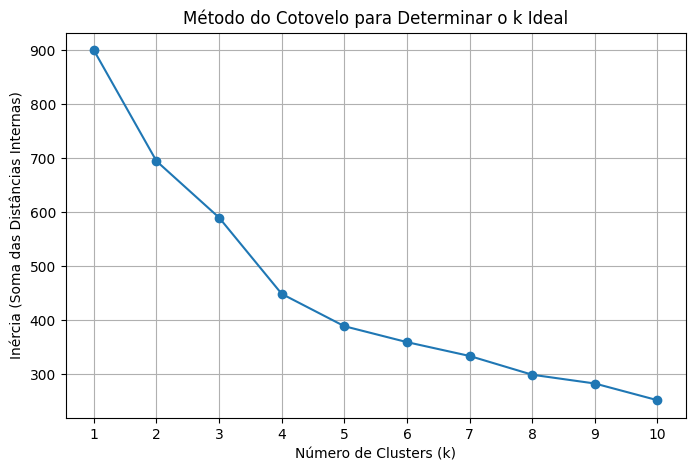

In [4]:
#Aplicando método do cotovelo para encontrar o número ideal de clusters
inertias = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma das Distâncias Internas)')
plt.title('Método do Cotovelo para Determinar o k Ideal')
plt.grid(True)
plt.xticks(k_values)
plt.show()

K-Means

In [5]:
#Aplicando KMeans com o k indicado pelo método do cotovelo acima
k_escolhido = 5
kmeans = KMeans(n_clusters=k_escolhido, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

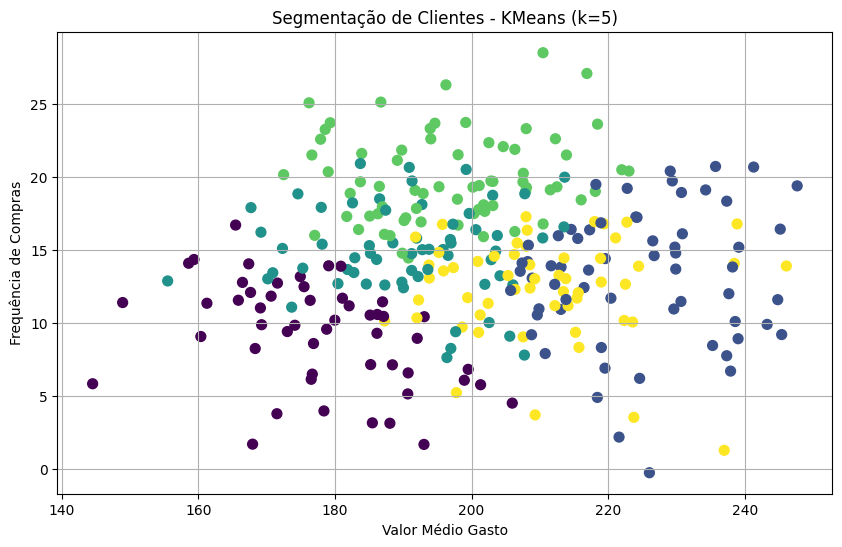

In [6]:
#Visualização dos clusters
plt.figure(figsize=(10,6))
plt.scatter(df['valor_medio_gasto'], df['frequencia_compras'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel("Valor Médio Gasto")
plt.ylabel("Frequência de Compras")
plt.title(f"Segmentação de Clientes - KMeans (k={k_escolhido})")
plt.grid(True)
plt.show()

 Métricas de avaliação da segmentação (silhouette, Davies-Bouldin)

In [7]:
# Silhouette Score
sil_score = silhouette_score(X_scaled, kmeans.labels_)

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")

Silhouette Score: 0.237
Davies-Bouldin Index: 1.173


O Silhouette Score obtido foi de aproximadamente 0,20, mostrando que os clusters apresentam uma separação moderada, com sobreposição entre grupos. Essa métrica de avaliação varia de -1 a 1, sendo que clusters bem definidos apresentam um Silhoute Score com valor próximo a 1.

Esse resultado é esperado em dados comportamentais reais, onde as diferenças entre perfis de clientes não são rigidamente definidas. Ainda assim, a segmentação permite identificar padrões úteis para apoiar decisões estratégicas de marketing.

No Índice de Davies-Bouldin, segunda métrica utilizada, na qual quanto menor o valor melhor o desempenho, obtivemos um resultado de 1,17. Isso mostra uam separação razoável entre os clusters, um resultado alinhando com o Silhouette Score, reforçando que existe sobreposição entre alguns grupos. Todavia a segmentação é suficiente para apoiar a análise e as estratégias de marketing direcionadas.

DBSCAN

In [8]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Número de clusters (excluindo ruído)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Número de clusters identificados pelo DBSCAN: {n_clusters_dbscan}")

Número de clusters identificados pelo DBSCAN: 1


In [9]:
# Avaliação do DBSCAN utilizando Silhoute Score
if n_clusters_dbscan > 1:
    sil_dbscan = silhouette_score(X_scaled, dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {sil_dbscan:.3f}")
else:
    print("DBSCAN não formou clusters suficientes para avaliação.")


DBSCAN não formou clusters suficientes para avaliação.


AVALIAÇÃO (K-Means X DBSCAN)

O K-Means apresentou melhor desempenho neste conjunto de dados, pois assume clusters aproximadamente esféricos e bem distribuídos, o que se alinha às características observadas.

Ao aplicar o algoritmo DBSCAN, foi identificado apenas um único cluster, o que impossibilitou o uso de métricas como o Silhouette Score, que requerem múltiplos agrupamentos.

Esse resultado indica que o conjunto de dados não apresenta regiões de densidade claramente separadas, característica que limita a eficácia do DBSCAN neste contexto.

O K-Means é de fato o mais adequado para o contexto, pois consegue particionar dados com variações contínuas, mesmo quando não há separações densas bem definidas.

**Insigths para estratégias de Marketing**

Cluster 0 – Clientes de Alto Valor (grupo azul escuro no canto superior direito)

Caracteriza-se por alta renda e alto valor médio de compra.
Estratégia sugerida: programas de fidelidade premium, ofertas personalizadas e acesso antecipado a produtos.

Cluster 1 – Clientes Frequentes de Baixo Ticket
(grupo na cor verde)

Compram com frequência, mas gastam menos por transação.
Estratégia sugerida: campanhas de upsell, combos promocionais e programas de pontos.

Cluster 2 – Clientes Ocasionalmente Ativos (grupo identificado com a cor roxo)

Baixa frequência e baixo gasto médio.
Estratégia sugerida: campanhas de reativação, cupons de desconto e remarketing.
